## TESSreduce in offline mode

There may be cases where we want to run TESSreduce in an 'offline' mode, such as when running processes on a supercomputer node that does not have direct access to the internet. In its default mode, TESSreduce connects to the internet in three ways: downloading the TPFs from the MAST archive, retrieving source catalogues from the Gaia archives, and generating TESS Pixel Response Functions from the TESS mission website. 

In offline mode these three steps must be performed outside the actual reduction procedure. TPFs must be downloaded locally, which can done using the `external_save_TESS()` function. This only requires a coordinate and a TESS sector as input, as well as the path to the save location for the TPF. THe size of the cutout will default to 90 x 90 pixels.

In [4]:
import tessreduce as tr

ra = 348.786
dec = -45.328
sector = 1
save_path = '/path/to/save/location'

tr.external_save_TESS(ra=ra,dec=dec,sector=sector,save_path=save_path,size=90)

Next, the source catalogues can be generated using the `external_save_cat()` function. This requires the RA and Dec, the cutout size, the path to the saved TPF, and the path to where the source catalogue should be saved. The limiting magnitude of the sources will default to 19.

In [5]:
image_path = '/path/to/local/TPF'
save_path = '/path/to/save'

tr.external_save_cat(tpf=image_path,save_path=save_path,maglim=19)

Finally, the TESS PRF files will need to be downloaded locally. Make sure you keep track of where they are stored as you will need to point to them later on. They are found at 
### https://archive.stsci.edu/missions/tess/models/prf_fitsfiles/.






Once this is all complete, we now can start our reduction. Rather than providing an RA, Dec, and Sector, all we need to do is pass a value for `tpf`, `catalogue_path`, and `prf_path` into the initialisation.

getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is below -30 dec, calibrating to SkyMapper photometry.


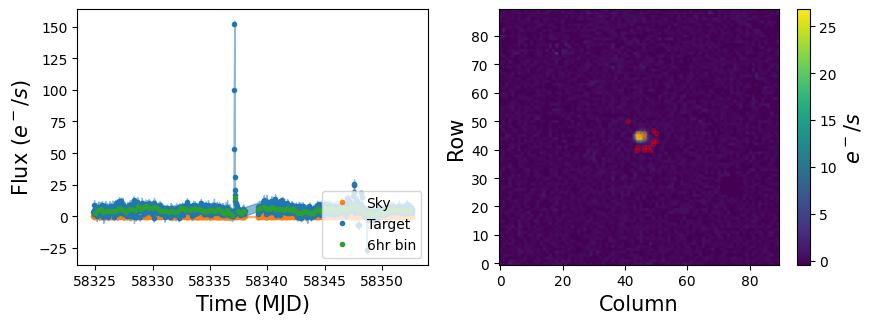

In [7]:
local_tess_file = '/path/to/local/TPF'
local_source_catalogue = '/path/to/local/source_catalogue'
local_prf_files = '/path/to/local/PRFs'

tess = tr.tessreduce(tpf=local_tess_file,catalogue_path=local_source_catalogue,prf_path=local_prf_files)